In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ushape.csv')

In [5]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


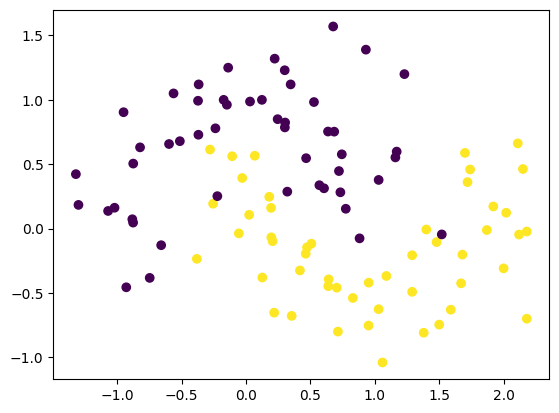

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.get_weights()

[array([[-0.12944345,  0.13583258, -0.16017905,  0.0337298 , -0.3014693 ,
         -0.76158684,  0.15896603,  0.16485621,  0.5010488 , -0.8060058 ],
        [-0.27543792, -0.09529227, -0.3490185 ,  0.20800671, -0.6781499 ,
         -0.47168052,  0.01045344, -0.21355832, -0.42325154, -0.33350807]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.3013454 ,  0.4964424 ,  0.12989348,  0.6199969 ,  0.25899708,
         -0.3196085 , -0.19179395, -0.00167969, -0.2130189 , -0.13126388],
        [ 0.54100966,  0.2948785 , -0.46185195, -0.04912532,  0.017463  ,
          0.06297325,  0.696548  ,  0.24075922, -0.40219945, -0.46600357],
        [ 0.2733742 , -0.01768341, -0.00700233, -0.03764282, -0.23690501,
          0.03322023,  0.33679813,  0.09282447,  0.17048298,  0.34672603],
        [ 0.14089032,  0.16645162, -0.02863294, -0.10670049, -0.08212822,
         -0.32516873, -0.2902012 ,  0.07899327,  0.08840091,  0.2468483 ],
        [ 0.27657

In [13]:
initial_weights = model.get_weights()

In [14]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [15]:
model.set_weights(initial_weights)

In [16]:
model.get_weights()

[array([[ 0.51754284,  0.8808145 , -0.72006017,  0.434164  , -0.5611256 ,
          1.0924776 , -0.09894248,  0.74801403, -1.272888  ,  0.7082538 ],
        [-0.39125973, -1.1251255 ,  0.73131937,  0.15995328, -0.91424626,
         -0.7306495 ,  0.20305276, -0.6710044 , -0.25183895, -1.21972   ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.13224085, -0.48144364, -0.22955517, -0.15031233,  0.34036267,
         -0.2101856 , -0.20235504, -0.45856783,  0.00212433,  0.16500202],
        [-0.30040422,  0.22118224, -0.07961391,  0.10993513,  0.6571462 ,
          0.19410795, -0.1652823 , -0.15633371,  0.56011486, -0.03797593],
        [-0.19078885, -0.0358896 , -0.22684243,  0.51412266,  0.27287078,
         -0.06152483,  0.00363957,  0.16980462, -0.45097652, -0.28282145],
        [ 0.43081543, -0.2731544 ,  0.14773774, -0.8631637 , -0.21212278,
         -0.02210652, -0.08707575,  0.08957623,  0.0879693 , -0.47826695],
        [-0.28458

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8523 - loss: 0.6003 - val_accuracy: 0.8500 - val_loss: 0.5551
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8188 - loss: 0.5833 - val_accuracy: 0.8500 - val_loss: 0.5363
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8617 - loss: 0.5690 - val_accuracy: 0.8500 - val_loss: 0.5185
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8438 - loss: 0.5532 - val_accuracy: 0.8500 - val_loss: 0.5024
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8109 - loss: 0.5600 - val_accuracy: 0.8500 - val_loss: 0.4876
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.5255 - val_accuracy: 0.8500 - val_loss: 0.4730
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7945 - loss: 0.5289 - val_accuracy: 0.8500 - val_loss: 0.4594
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7867 - loss: 0.5287 - val_accuracy: 0.8500 - val_loss:

In [19]:
model.get_weights()

[array([[ 0.44777653,  0.73750377, -0.5737665 ,  0.4320021 , -0.60183984,
          0.91548175, -0.19965169,  0.87865454, -1.1388268 ,  0.6593957 ],
        [-0.48129323, -1.268948  ,  0.8377497 ,  0.2594114 , -0.94316024,
         -0.8613708 ,  0.14305371, -0.6043268 , -0.24710006, -1.3208445 ]],
       dtype=float32),
 array([-0.00776191, -0.10155436,  0.11118967, -0.00107161,  0.09637145,
        -0.10577079, -0.04069803,  0.03242418, -0.16263747, -0.05734245],
       dtype=float32),
 array([[ 4.12050402e-03, -3.54841977e-01, -2.96278298e-01,
         -3.54531743e-02,  3.07627678e-01, -2.66101420e-01,
         -1.16889618e-01, -5.05720019e-01,  8.23754743e-02,
          2.31757477e-01],
        [-4.13379937e-01,  3.65865350e-01, -1.41253427e-01,
          2.23697081e-01,  6.11120164e-01,  1.43956736e-01,
         -7.19031245e-02, -2.00953379e-01,  6.57645881e-01,
          2.94298977e-02],
        [-7.04938769e-02, -1.75577074e-01, -1.62146613e-01,
          3.94762367e-01,  3.15085

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 633us/step


<Axes: >

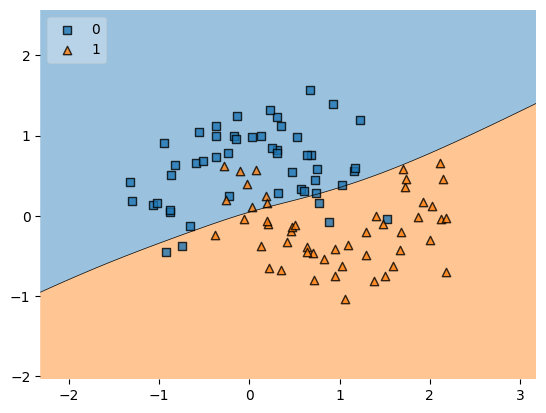

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [21]:
(np.random.randn(10,10)*0.01).min()

-0.019417361590753145

In [22]:
(np.random.randn(10,10)*0.01).max()

0.026004763662609915